# A/B-тест для интернет-магазина

**Цель исследования:** проанализировать результаты A/B-теста.

**Этапы исследования:**
1) Приоритизация гипотез;
2) Запуск A/B-теста;
3) Анализ результата.

**Описание данных:** в исследовании используются несколько датасетов:
1) Датасет с гипотезами;
2) Датасет с информацией о заказах;
3) Датасет с информацией о пользователях

### Приоритизация гипотез

In [90]:
#импортируем библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [91]:
# зададаим формат отображения колонок
pd.options.display.max_colwidth = 130

In [92]:
# откроем файл и ознакомимся с данными
hyp = pd.read_csv('/datasets/hypothesis.csv')
hyp.info()
hyp.head(9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Значения целые, пропусков, дубликатов нет. 

In [93]:
# переведем названия колонок в нижний регистр
hyp.columns = hyp.columns.str.lower()
hyp.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


#### Применим фреймворк ICE для приоритизации гипотез. 

In [94]:
hyp['ICE'] = hyp['impact'] * hyp['confidence'] / hyp['efforts']
hyp_ICE = hyp[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)
hyp_ICE

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


По фреймворку ICE приорететнее оказались гипотезы:

1) "Запустить акцию, дающую скидку на товар в день рождения"\
2) "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"\
3) "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

#### Применим фреймворк RICE для приоритизации гипотез. 

In [95]:
hyp['RICE'] = hyp['impact'] * hyp['reach'] * hyp['confidence'] / hyp['efforts']
hyp_RICE = hyp[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).round(2)
hyp_RICE

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По фреймворку RICE приоритетнее оказались гипотезы:

1) "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
2) "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
3) "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
4) "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"

**Вывод:**
При приоритизации гипотез при помощи разных фреймворков результат так же меняется. Например, лидирующая гипотеза по ICE ("Запустить акцию, дающую скидку на товар в день рождения") при применении RICE находится лишь на 5 месте, а лидирующей является - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (по ICE 3я). Приоритезацию меняет параметр "reach"(охват пользователей), который включен в формулу расчета по методу RICE. В данном случае стоит ориентироваться на RICE, данный фреймворк менее субъективен, охват аудитории важный показатель, данные по которому можно собрать и проанализировать. Но если необходима быстрая приоритезаци то ICE в этом случае подходит лучше.

### Анализ A/B-теста

In [96]:
# откроем датасет с заказами и ознакомимся с данными
orders = pd.read_csv('/datasets/orders.csv')
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [97]:
# поменяем тип столбца с датой на  datetime
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

In [98]:
# посмотрим дубликаты
orders.duplicated().sum()

0

In [99]:
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

In [100]:
double_users = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitorId'].unique()
double_users

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

В датасете нет пропусков и дубликатов. Изменила тип столбца с датой на datetime. 

In [101]:
# откроем датасет с пользователями и ознакомимся с данными
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [102]:
# поменяем тип столбца с датой на  datetime
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [103]:
# посмотрим дубликаты
visitors.duplicated().sum()

0

В датасете также нет пропусков и дубликатов. Тип столбца с датой поменяла на datetime. 

In [104]:
# посмотрим, присутствуют ли пользователи, входящие в оба теста сразу
a = orders[orders['group'] == 'A']['visitorId']
b = orders[orders['group'] == 'B']['visitorId']
orders_ab = orders.query('visitorId in @a and visitorId in @b')
display(orders_ab['visitorId'].unique())
print('Количество пользователей в двух группах:', orders_ab['visitorId'].nunique())
print('Всего пользователей в тесте:', orders['visitorId'].nunique())

array([4069496402,  963407295,  351125977, 3234906277,  199603092,
        237748145, 3803269165, 2038680547, 2378935119, 4256040402,
       2712142231,    8300375,  276558944,  457167155, 3062433592,
       1738359350, 2458001652, 2716752286, 3891541246, 1648269707,
       3656415546, 2686716486, 2954449915, 2927087541, 2579882178,
       3957174400, 2780786433, 3984495233,  818047933, 1668030113,
       3717692402, 2044997962, 1959144690, 1294878855, 1404934699,
       2587333274, 3202540741, 1333886533, 2600415354, 3951559397,
        393266494, 3972127743, 4120364173, 4266935830, 1230306981,
       1614305549,  477780734, 1602967004, 1801183820, 4186807279,
       3766097110, 3941795274,  471551937, 1316129916,  232979603,
       2654030115, 3963646447, 2949041841])

Количество пользователей в двух группах: 58
Всего пользователей в тесте: 1031


#### Кумулятивная выручка по группам

In [105]:
#создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
#получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
#получаем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
#объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


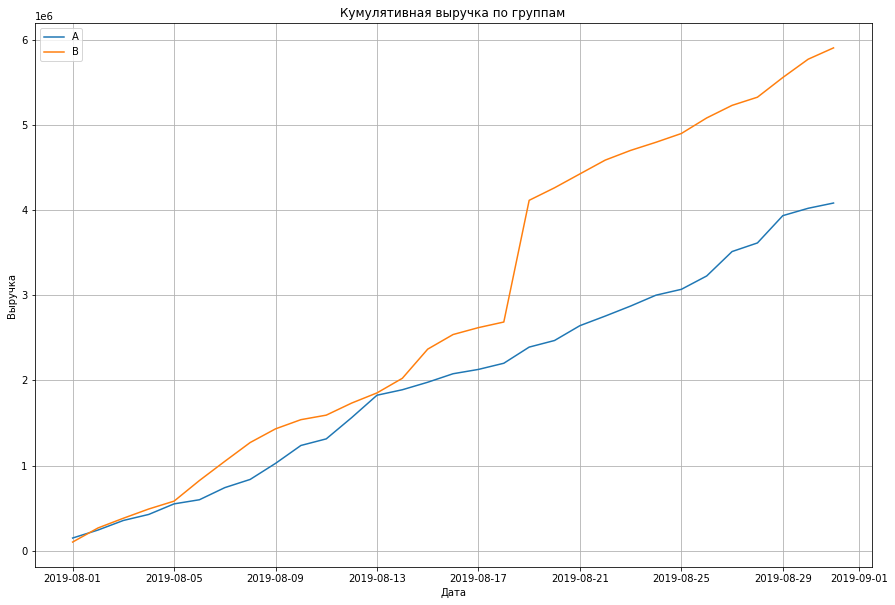

In [106]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15, 10))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.legend()
plt.show()


**Вывод:**  Примерно до середины теста выручка распределялась равномерно между группами. В середине теста кумулятивная выручка в группе B стала гораздо выше. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов. 

#### Кумулятивный средний чек по группам

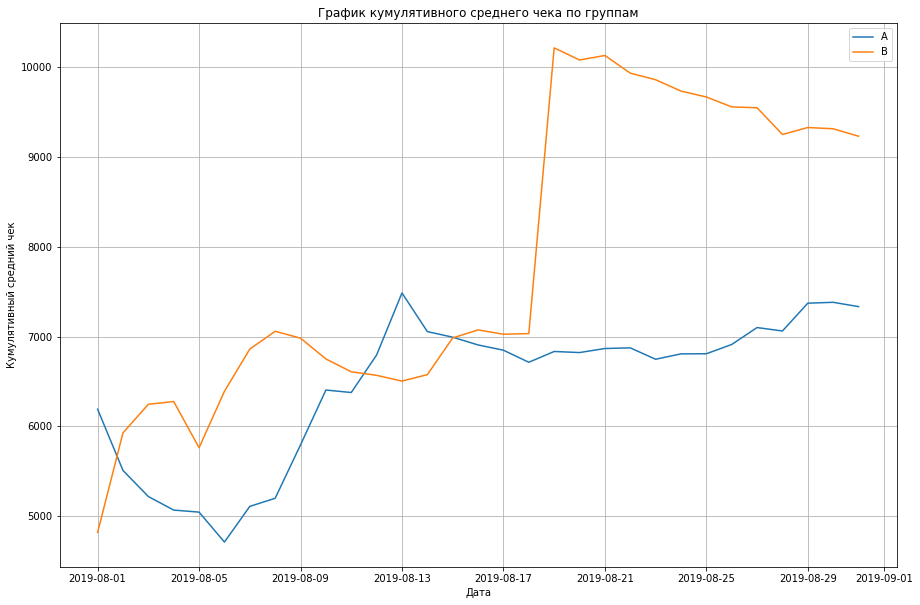

In [107]:
plt.figure(figsize=(15, 10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный cредний чек')
plt.grid()
plt.legend()
plt.show()

**Вывод:**  Кумулятивный средний чек группы B имеет резкий рост в середине теста, аналогично графику кумулятивной выручки. Что  говорит о совершении аномально дорогих покупок в этот период.


#### График относительного изменения кумулятивного среднего чека группы B к группе A.

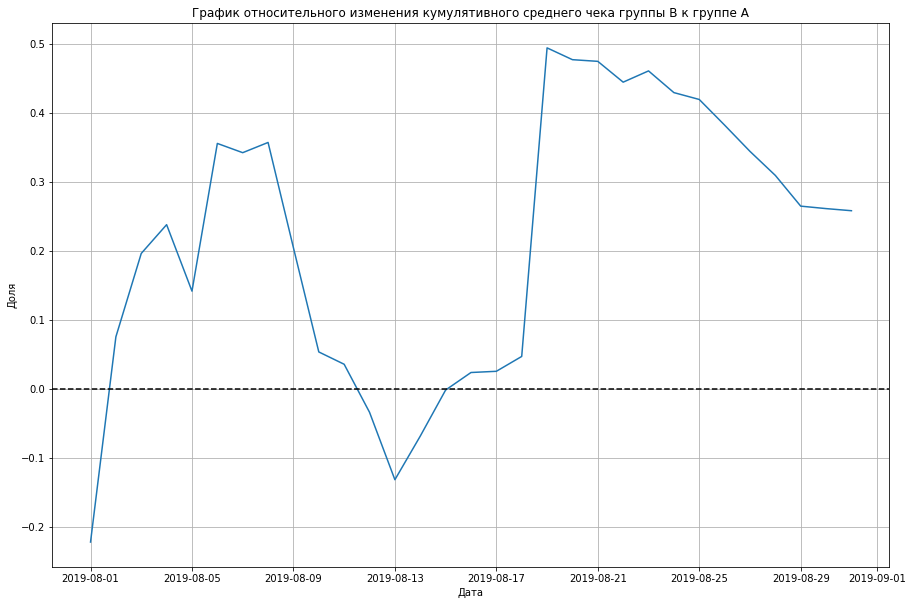

In [108]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15, 10))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Доля')
plt.grid()
plt.show()

**Вывод:** В нескольких точках график различия между сегментами имеет резкий рост, видимо тогда были совершены аномальные заказы. Также в основном график расположен выше нуля, что говорит о превышении показателя группы В над А

#### График кумулятивного среднего количества заказов на посетителя по группам.

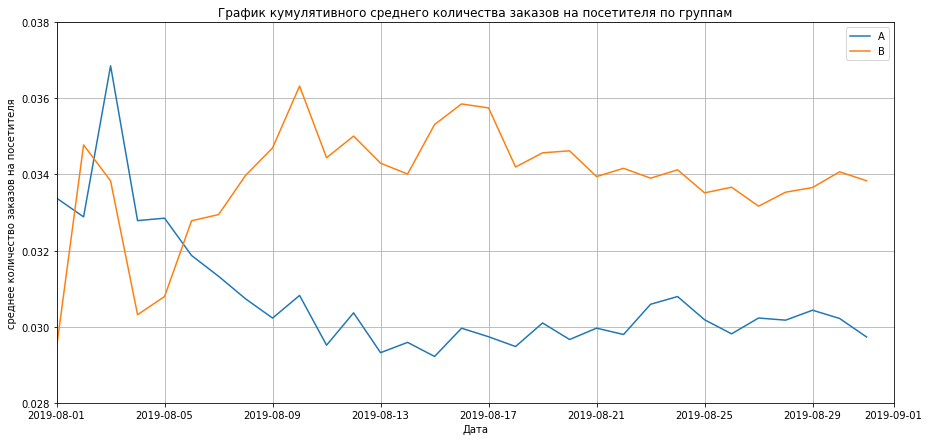

In [109]:
# считаем кумулятивную среднего количества заказов на посетителя по группам
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.028, 0.038])
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('среднее количество заказов на посетителя')
plt.legend()
plt.grid()
plt.show()

**Вывод:** В начале теста группа А имела большую конверсию. Однако после конверсия группы B стала выше показателя группы А, и далее показатель в группе В стабильно выше.

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

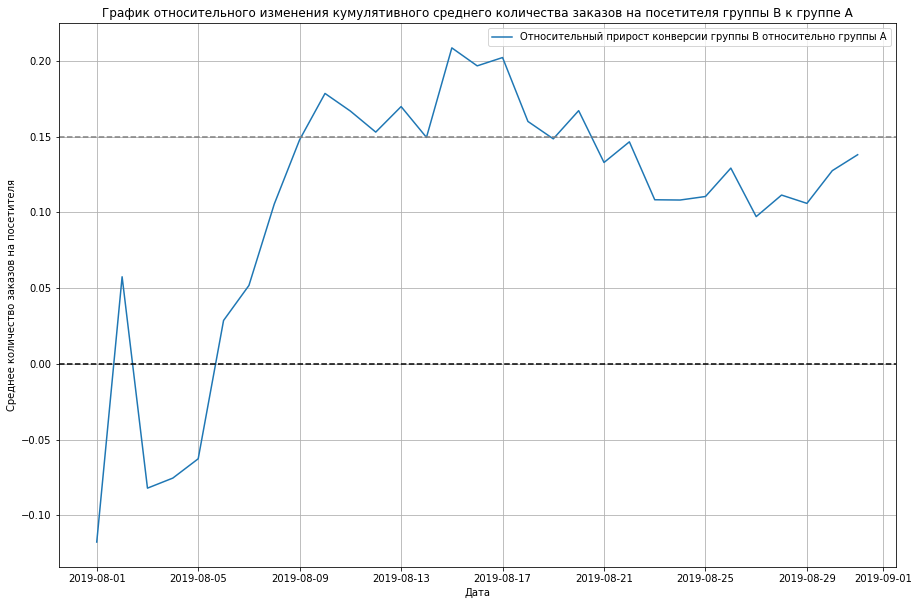

In [110]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
#строим график
plt.figure(figsize=(15, 10))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.legend()
plt.grid()
plt.show()

**Вывод:** По графику видно, что группа B лидирует примерно после 5-го дня теста и сохраняет преимущество в диапазоне 10-20% до конца теста.

#### Точечный график количества заказов по пользователям и  95-й и 99-й перцентили количества заказов на пользователя.

       visitorId  transactionId
1023  4256040402             11
591   2458001652             11
569   2378935119              9
487   2038680547              8
44     199603092              5
744   3062433592              5
55     237748145              5
917   3803269165              5
299   1230306981              5
897   3717692402              5


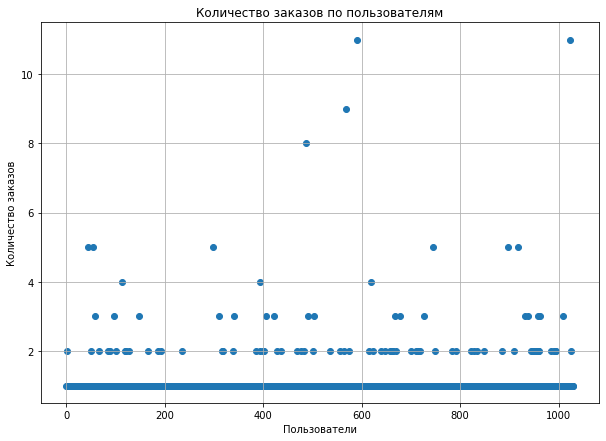

In [111]:
# подсчитаем количество заказов по пользователям 
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'transactionId']

print(ordersByUsers.sort_values(by='transactionId', ascending=False).head(10))

# строим график
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10, 7))
plt.scatter(x_values, ordersByUsers['transactionId'])
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title("Количество заказов по пользователям")
plt.grid()
plt.show()

In [112]:
# выведем перцентили
print(np.percentile(ordersByUsers['transactionId'], [95, 99]))

[2. 4.]


**Вывод:** В основном пользователи делают 1-2 заказа. Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более четырех раз. Определим границу по 99 перцентилю, т.е. не будем учитывать пользователей сделавших более 4 заказов. Так как подобные заказы встречаются довольно редко, но могут влиять на расчеты. 

#### Точечный график стоимости заказов по пользователям и  95-й и 99-й перцентили стоимости заказов на пользователя.

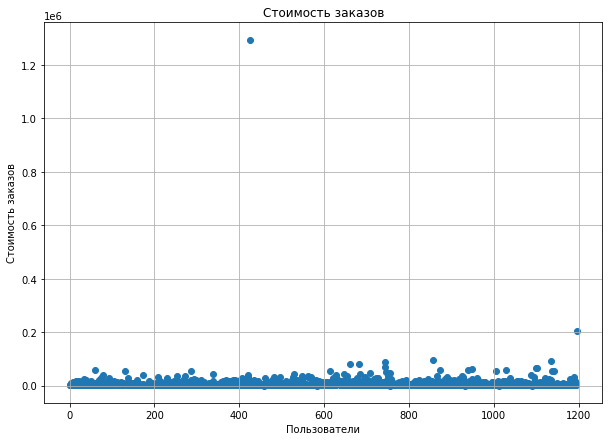

In [113]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10, 7))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.title("Стоимость заказов")
plt.grid()
plt.show()


In [114]:
# выведем перцентили
print(np.percentile(orders['revenue'] , [95, 99]))

[28000.  58233.2]


**Вывод:** Не более 5% пользователей оформляли заказы на сумму более 28 000. И 1% пользователей заказывали на сумму более 58 233. На графике видно значения более 1млн 300 тыс и 200 тыс., которые можно считать аномальными. Определяем границу по величине 99% перцентиля (58233)

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформируем нулевую и альтернативную гипотезы:
- H0:Среднее количество заказов на посетителя групп A и B равны, статистически значимых отличий нет;
- H1:Среднем количество заказов на посетителя групп A и B различны, статистически значимые отличия есть.

In [115]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


In [116]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [117]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transactionId'] 

sampleA = pd.concat([ordersByUsersA['transactionId'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['transactionId'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])), name='orders')],axis=0)

print('P-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительные различия:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.017
Относительные различия: 0.138


#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

Также сформулируем гипотезы:
- H0:Средние чеки групп A и B равны, статистически значимых отличий нет;
- H1:Средние чеки групп A и B различны, статистически значимые отличия есть.

In [118]:
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                                     orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия:','{0:.3f}'.format(orders[orders['group']=='B']['revenue']
                                                .mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.729
Относительные различия: 0.259


**Вывод:** P-value больше 0.05, статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между сегментами около 26%.

#### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Очистим данные от аномалий. Примем за аномальных пользователей тех, кто совершил 4 заказа и более, или совершил заказ на сумму свыше 28 000 рублей. Так уберется 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью. 

In [119]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > np.percentile(ordersByUsers['transactionId'], 99)]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > np.percentile(ordersByUsers['transactionId'], 99)]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [120]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительные различия:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.014
Относительные различия: 0.153


**Вывод:** Как и в случае с "сырыми данными", статистическая значимость достигнута, P-value меньше 0.05 . Показатель группы В лучше группы А на 15.3%. 

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [121]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    ))

P-value: 0.851
Относительные различия: -0.006


**Вывод:** P-value больше 0.05. Значит, статистическая значимость не достигнута. По разнице средних чеков групп различий практически нет,  и после удаления выбросов разница между сегментами сократилась с 26% до -0.6%. 

### Анализ результата

На основании полученных результатов наблюдаем следующее:
- Есть статистически значимое различие в среднем количестве заказов на посетителя между группами как по «очищенным» данным так и по "сырым данным".
- Нет статистически значимого различия в среднем чеке заказа между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего количества заказов на посетителя между группами сообщает, что результаты группы B лучше группы A на примерно в районе 15%.
- График различия среднего чека говорит о том, что результаты группы B также лучше группы А примерно на 20%.

На основании полученных фактов можно принят решение: Остановить тест, так как группа B на данном этапе уже значимо превосходит группу А.